# Introduction to Logistic Regression

In this notebook you will see how logistic regression works very graphically. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

sns.set()

Next, we’ll take advantage of the `make_classification` function from the scikit-learn library to generate data. 
Since logistic regression is primarily only applicable to binary classification problems, the data points in our case are composed of two classes.

In [2]:
# We set a random state so the generated data is the same for each run of this cell
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03, # introduces noise for 3% of the data points
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    random_state=3789
)

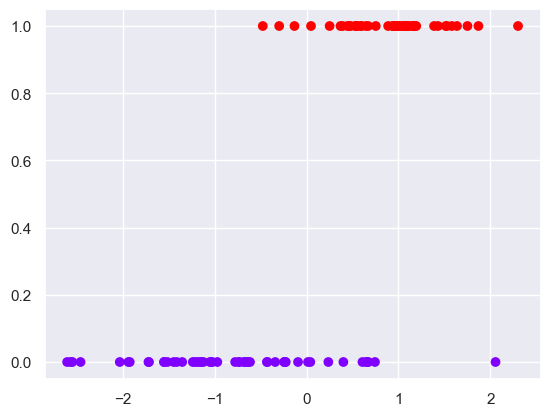

In [3]:
# We plot the relationship between the feature and classes. 
plt.scatter(x, y, c=y, cmap='rainbow');

In [4]:
# Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1) # default size of the training data is 75%

In [5]:
# We instantiate an instance of the LogisticRegression class and call the fit function with the features and the labels 
# (since Logistic Regression is a supervised machine learning algorithm) as arguments.

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [6]:
# We can access the following properties to actually view the coefficient for the slope and y-intercept of the best fitting line.
print(lr.coef_)
print(lr.intercept_)

[[2.17662474]]
[-0.05037611]


In [7]:
# Let’s see how the model performs against data that it hasn’t been trained on.
y_pred = lr.predict(X_test)

In [8]:
# Given that this is a classification problem, we use a confusion matrix to evaluate our model.
confusion_matrix(y_test, y_pred)

array([[12,  4],
       [ 0,  9]], dtype=int64)

In [9]:
# If for whatever reason we’d like to check the actual probability that a data point belongs to a given class, 
# we can use the predict_proba function.
lr.predict_proba(X_test)

array([[0.98582561, 0.01417439],
       [0.17225006, 0.82774994],
       [0.92934938, 0.07065062],
       [0.13215422, 0.86784578],
       [0.68864373, 0.31135627],
       [0.16949557, 0.83050443],
       [0.99632542, 0.00367458],
       [0.97810516, 0.02189484],
       [0.89721872, 0.10278128],
       [0.97781542, 0.02218458],
       [0.63745537, 0.36254463],
       [0.2042561 , 0.7957439 ],
       [0.10819387, 0.89180613],
       [0.82404145, 0.17595855],
       [0.0325378 , 0.9674622 ],
       [0.07543907, 0.92456093],
       [0.30554031, 0.69445969],
       [0.19568065, 0.80431935],
       [0.04877166, 0.95122834],
       [0.24487613, 0.75512387],
       [0.11812066, 0.88187934],
       [0.5042553 , 0.4957447 ],
       [0.95249277, 0.04750723],
       [0.03640296, 0.96359704],
       [0.98625784, 0.01374216]])

The first column corresponds to the probability that the sample belongs to the first class and the second column corresponds to the probability that the sample belongs to the second class.
Before attempting to plot the Sigmoid function, we create and sort a DataFrame containing our test data.

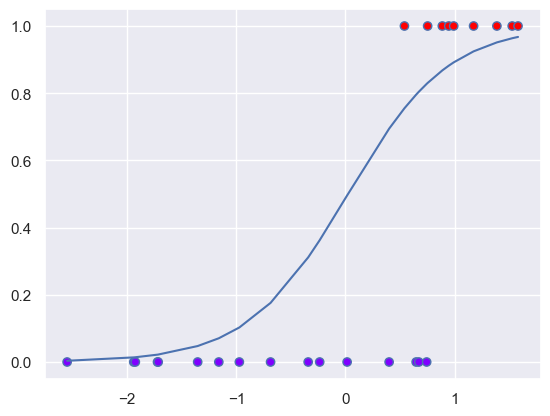

In [12]:
df = pd.DataFrame({'x': X_test[:,0], 'y': y_test})
df = df.sort_values(by='x')


from scipy.special import expit

sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

**Check your understanding:**
- How many data points will be misclassified in the graph above if you choose a threshold at 0.5?
- Which threshold would you choose to improve the accuracy?
- Which threshold would you choose to improve recall?

In [ ]:
# 1. 5 datapoints are misclassified
# 2. ~0.88
# 3. also 0.7

